In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)


X [[-1.45911997  1.27418673]
 [-1.40811432  0.7656503 ]
 [-0.80951052 -1.65609373]
 [-2.12064621 -0.66898039]
 [-1.47889457  0.75970564]
 [ 0.21492267 -0.94078319]
 [-0.88723533  1.27909021]
 [-1.69760226  0.2121016 ]
 [-0.95780633 -1.46767931]
 [-2.10161186 -0.05177387]
 [-0.57325084 -1.35015894]
 [ 0.321193   -0.02985844]
 [-2.5735914  -0.87730766]
 [-1.14876618  0.61554048]
 [-1.38262269  0.65768775]
 [-0.09595018 -0.40346164]
 [-0.76692811  1.06812167]
 [-2.10942592 -0.23163573]
 [ 0.55893733 -2.0168051 ]
 [-1.42934539 -1.8439296 ]
 [-1.84899277  0.29284397]
 [-1.00962409  1.14260845]
 [-1.80151453 -1.76488978]
 [ 0.41228357  2.37044324]
 [-1.96672657 -0.45787397]
 [-1.92263976 -0.07816785]
 [-0.68467409  1.31431729]
 [-1.72232541  0.34032824]
 [-1.61710431  0.55440197]
 [-0.50158669  1.46554165]
 [-1.13494826 -1.10274489]
 [ 0.04382985  1.99953558]
 [-0.91949553 -1.23405738]
 [-1.58958085 -0.66467512]
 [-1.15834408  0.86326863]
 [ 0.19071829  2.2581361 ]
 [ 0.85374174  0.45121711]

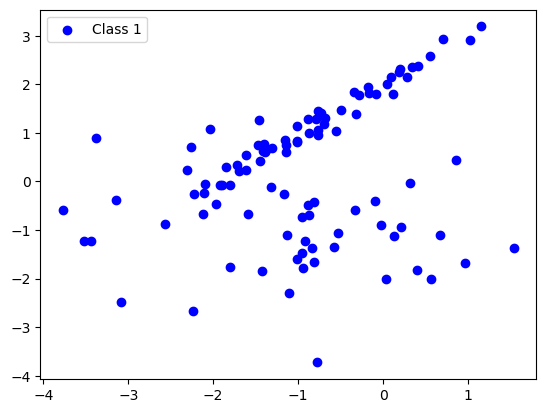

In [6]:
# Plot
plt.scatter(X[:, 0], X[:, 1], color='b', label='Class 1')
#plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.legend()
plt.show()


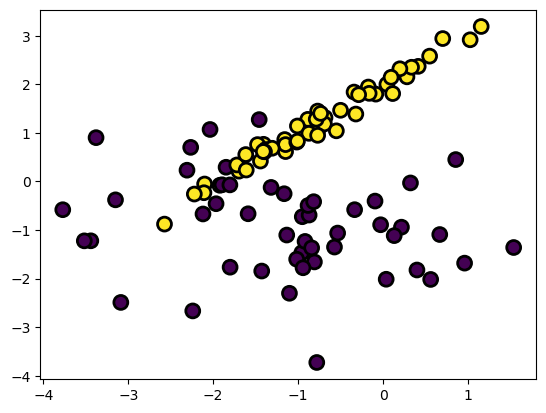

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)

data.shape torch.Size([100, 2])
Epoch [1/1000], Loss: 0.5326
Epoch [101/1000], Loss: 0.4271
Epoch [201/1000], Loss: 0.3841
Epoch [301/1000], Loss: 0.3626
Epoch [401/1000], Loss: 0.3498
Epoch [501/1000], Loss: 0.3411
Epoch [601/1000], Loss: 0.3349
Epoch [701/1000], Loss: 0.3301
Epoch [801/1000], Loss: 0.3263
Epoch [901/1000], Loss: 0.3233


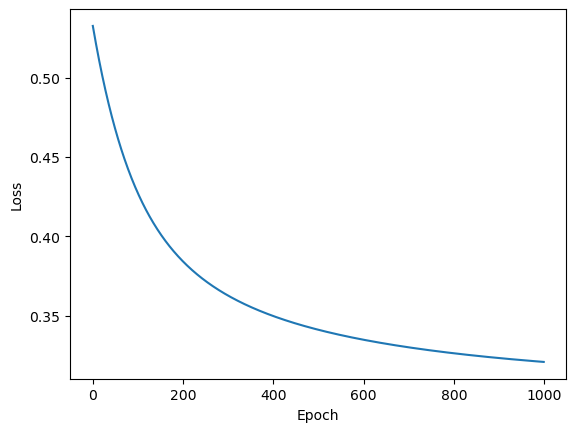

w [[0.11677051 1.6602454 ]]
b [-0.11347333]


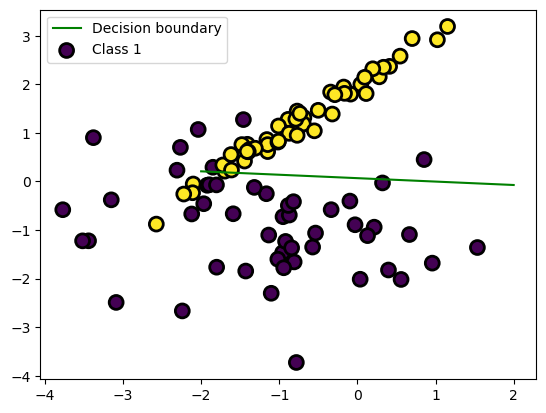

In [9]:
import torch
import torch.nn as nn

# Convert data and labels to PyTorch Variables
data = torch.from_numpy(X).float()
labels = torch.from_numpy(y).float()
labels = labels.view(-1, 1) ## reshape와 같은 함수
num_samples, num_features = data.shape

print("data.shape",data.shape)

# Define logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# Initialize model, loss function, and optimizer
learning_rate = 0.01
num_epochs = 1000
input_dim = num_features
output_dim = 1
model = LogisticRegression(input_dim, output_dim)
criterion = nn.BCELoss() #Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train model
loss_history = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.data.numpy())

    if epoch % 100 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, loss.data))

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot decision boundary
w = model.linear.weight.data.numpy()
print("w", w)
b = model.linear.bias.data.numpy()
print("b", b)
x_plot = np.array([-2, 2])
y_plot = (-b - w[0][0]*x_plot) / w[0][1]    #  0 = w1 x1 + w2 x2 + b
plt.plot(x_plot, y_plot, color='g', label='Decision boundary')
#plt.scatter(X[:, 0], X[:, 1], color='b', label='Class 1')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2, label='Class 1')
plt.legend()
plt.show()


In [5]:
model(torch.Tensor([-3,-3]))

tensor([0.0007], grad_fn=<SigmoidBackward0>)

In [12]:
model(torch.Tensor([1,1]))

tensor([0.8407], grad_fn=<SigmoidBackward0>)

In [46]:
test_point = torch.tensor([1999999.0, 1.0]).float()

with torch.no_grad():
    predicted_prob = model(test_point)
    clllasss = 1 if predicted_prob.item() > 0.5 else 0

print(f"[1, 1] 는 {clllasss} 클래스에 속합니다.")



[1, 1] 는 0 클래스에 속합니다.


In [45]:
test_point = torch.tensor([-5214124.0, 1.0]).float()
predicted_prob = model(test_point)
predicted_prob.item()

0.0

In [17]:
model.eval()
test = model(torch.Tensor([1,1]))
print( test.squeeze().detach())

tensor(0.8407)
